In [1]:
import setup_runs as sr
import pandas as pd
import numpy as np
import os, os.path
import importlib
import shutil
import matplotlib.pyplot as plt


In [2]:

#set ade directory on James machine
dir_ade_beta = "/Volumes/[C] syme-j-PVM.hidden/Users/jsyme/Documents/Projects/SWCHE076-1000/ade_beta"
#set tmp
dir_ade_beta_tmp = os.path.join(dir_ade_beta, "tmp")
#get files that are available
fn_avail_abt = os.listdir(dir_ade_beta_tmp)
#substring identifier
ppi_substr = "pyparams_interface-"
#filter
sectors_read = [x.replace(ppi_substr, "").replace(".csv", "") for x in fn_avail_abt if (".csv" in x) and (ppi_substr in x) and ("._" not in x)]
#dictionary
dict_ppi = {}
#read in 
for sector in sectors_read:
    #
    fp_read = os.path.join(dir_ade_beta_tmp, ppi_substr + sector + ".csv")
    #read 
    df_read = pd.read_csv(fp_read)
    #add to the dictionary
    dict_ppi.update({sector: df_read})


#read in the parameter ranges file
df_param_ranges = pd.read_csv(sr.fp_csv_parameter_ranges)
df_ts = df_param_ranges[["time_series_id", "strategy_id"]].drop_duplicates()

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/[C] syme-j-PVM.hidden/Users/jsyme/Documents/Projects/SWCHE076-1000/ade_beta/tmp'

In [3]:
for k in dict_ppi.keys():
    cols = list(set(dict_ppi[k]["pyparams"]))
    cols.sort()
    cols = tuple(cols)
    print("\n" + str(k) + ":")
    print(("\t%s \n"*len(cols))%cols)



agriculture:
	Incertidumbre_PIB 
	Incertidumbre_Poblacion 
	Incertidumbre_PrecioBovino 
	Incertidumbre_PrecioCerdo 
	Incertidumbre_PrecioLeche 
	Incertidumbre_PrecioMaiz 
	Incertidumbre_PrecioPollo 
	Medida_CambioDietaBovina 


forestry:
	Incendio Bosque Nativo 
	Incendio Plantaciones Forestales 
	IncertidumbrePIB 
	IncertidumbrePoblacion 
	Leña Especies exóticas 
	Leña Especies nativas 
	Recuperacion_BN 
	Sustitución y degradación 
	Tierras convertidas a BN 
	Tierras convertidas a plantaciones 


ippu:
	pyparam NuevaCapRecuperacion 
	pyparam PIB 
	pyparam Poblacion 
	pyparam PqeVehicular 


waste:
	pyparams CumplimientoMetas 
	pyparams PIB 
	pyparams PTASAntofa 
	pyparams PTASBiobio 
	pyparams PTASLSCoq 
	pyparams PTASValpo 
	pyparams PobRural 
	pyparams PobUrbana 
	pyparams Poblacion 
	pyparams RSArauc 
	pyparams RSAysen 
	pyparams RSCoq 
	pyparams RSMagallanes 
	pyparams RSTarapaca 
	pyparams RSValpo 



In [4]:
#get all parameters
df_all_params = []
#loop over the keys
for sector in dict_ppi.keys():
    #get unique parameters to build map
    df_tmp = dict_ppi[sector][["pyparams"]].drop_duplicates()
    df_tmp["sector"] = [sector for x in range(len(df_tmp))]
    df_tmp = df_tmp[["sector", "pyparams"]]
    #add to output
    df_all_params.append(df_tmp)
#build dataframe
df_all_params = pd.concat(df_all_params, axis = 0)
#export temprary file
df_all_params.to_csv("/Users/jsyme/Desktop/df_all_params.csv", index = None, encoding = "UTF-8")
    

In [9]:
pd.read_csv(sr.fp_csv_attribute_pyparams)

,sector,pyparams_by_sector,parameter,ppi_overwrite_scale_factor
0,agriculture,Incertidumbre_PIB,pib,1.000000e+09
1,agriculture,Incertidumbre_Poblacion,poblacion,NaN
2,agriculture,Incertidumbre_PrecioLeche,precio_leche,NaN
3,agriculture,Incertidumbre_PrecioMaiz,precio_maiz,NaN
4,agriculture,Incertidumbre_PrecioCerdo,precio_cerdo,NaN
5,agriculture,Incertidumbre_PrecioBovino,precio_bovino,NaN
6,agriculture,Incertidumbre_PrecioPollo,precio_pollo,NaN
7,agriculture,Medida_CambioDietaBovina,medida_cambio_dieta_bovina,NaN
8,forestry,IncertidumbrePIB,pib,1.000000e+09
9,forestry,IncertidumbrePoblacion,poblacion,NaN


In [21]:
df_pp

,sector,pyparams_by_sector,parameter,ppi_overwrite_scale_factor
0,agriculture,Incertidumbre_PIB,pib,1.000000e+09
1,agriculture,Incertidumbre_Poblacion,poblacion,1.000000e+00
2,agriculture,Incertidumbre_PrecioLeche,precio_leche,1.000000e+00
3,agriculture,Incertidumbre_PrecioMaiz,precio_maiz,1.000000e+00
4,agriculture,Incertidumbre_PrecioCerdo,precio_cerdo,1.000000e+00
5,agriculture,Incertidumbre_PrecioBovino,precio_bovino,1.000000e+00
6,agriculture,Incertidumbre_PrecioPollo,precio_pollo,1.000000e+00
8,forestry,IncertidumbrePIB,pib,1.000000e+09
9,forestry,IncertidumbrePoblacion,poblacion,1.000000e+00
11,forestry,Especies nativas,especies_nativas,1.000000e+00


In [10]:
#initialize data frame
init_q = True
#set classification for parameters
dict_sector_p = {}
#loop and build
for p in dict_param_ts.keys():
    #fields
    fields_dat = [x for x in dict_param_ts[p].columns if x != "year"]
    
    if len(fields_dat) == 1:
        field_ext = fields_dat[0]
        
        #add to dictionary
        if p in ["poblacion_rural", "poblacion_urbana"]:
            dict_sector_p.update({p: ("Analytica_all")})
        else:
            dict_sector_p.update({p: ("Analytica_" + field_ext)})
    else:
        #add to dictionary
        dict_sector_p.update({p: ("Analytica_all")})
        #loop over first year to get fields that aren't NA
        fe = []
        for f in fields_dat:
            if not np.isnan(dict_param_ts[p][f].iloc[0]):
                fe.append(f)
        #check for waste
        if "waste" in fe:
            field_ext = "waste"
        else:
            field_ext = fe[0]
    #pull field
    df_tmp = dict_param_ts[p][["year", field_ext]].copy().rename(columns = {field_ext: p})
    df_tmp = df_tmp[df_tmp["year"] >= 2015]
    #add to df pr
    if init_q:
        df_pr = df_tmp.copy()
        init_q = False
    else:
        df_pr = pd.merge(df_pr, df_tmp, how = "outer", on = ["year"])
#sort
df_pr = df_pr.sort_values(by = ["year"]).reset_index(drop = True)
#fill with earliest values for variables that have no value before 2019
df_pr = df_pr.fillna(method = "bfill")
#integer fields
fields_int = ["poblacion_rural", "poblacion_urbana", "poblacion"]

for fi in fields_int:
    df_pr[fi] = np.array(df_pr[fi]).astype(int)


#get times
times = list(df_pr["year"])
#build new dictionary
dict_rnm = {}
for i in range(len(times)):
    dict_rnm.update({i: str(times[i])})
#initialize the output
df_pr_out0 = df_pr.transpose().reset_index().rename(columns = {"index": "parameter"})
#drop times
df_pr_out0 = df_pr_out0[df_pr_out0["parameter"] != "year"].rename(columns = dict_rnm)

#add a dummy to facilitate merge
df_pr_out0["dummy"] = [1 for x in range(len(df_pr_out0))]
df_ts["dummy"] = [1 for x in range(len(df_ts))]
#loop to add
df_pr_out1 = pd.merge(df_pr_out0, df_ts, how = "outer", on = ["dummy"])
#add the sector
df_pr_out1["sector"] = df_pr_out1["parameter"].replace(dict_sector_p)
#add the normalize group
df_pr_out1["normalize_group"] = [np.nan for x in range(len(df_pr_out1))]
#add in the min/max ranges
df_pr_out1["min_2050"] = [0.8 for x in range(len(df_pr_out1))]
df_pr_out1["max_2050"] = [1.2 for x in range(len(df_pr_out1))]
df_pr_out1["type"] = ["incertidumbre" for x in range(len(df_pr_out1))]

#sort in same order as parameter_ranges.csv
df_pr_out1 = df_pr_out1[df_param_ranges.columns]
df_pr_out1 = df_pr_out1.sort_values(by = ["sector", "parameter", "time_series_id", "strategy_id"])


#write output to temporary file
#df_pr_out1.to_csv(sr.fp_csv_parameter_ranges_for_analytica_base, index = None, encoding = "UTF-8")








NameError: name 'dict_param_ts' is not defined

In [165]:
df_prin = pd.read_csv(sr.fp_csv_parameter_ranges)
df_prin = df_prin.dropna(how = "all")
for f in [x for x in df_prin.columns if "_id" in x]:
    df_prin[f] = np.array(df_prin[f]).astype(int)
df_prin["strategy_id"] = df_prin["strategy_id"].replace({3: 1})

In [168]:
df_prin.to_csv(sr.fp_csv_parameter_ranges, index = None, encoding = "UTF-8")

In [11]:
dict_param_ts.keys()

NameError: name 'dict_param_ts' is not defined

In [237]:
dict_param_ts["pib"]

,Time,agriculture,forestry,ippu,waste
61,1950,NaN,NaN,NaN,0.000000
62,1951,NaN,NaN,NaN,0.000000
63,1952,NaN,NaN,NaN,0.000000
64,1953,NaN,NaN,NaN,0.000000
65,1954,NaN,NaN,NaN,0.000000
...,...,...,...,...,...
27,2046,4.716087e+11,4.716087e+11,471.608701,471.608701
28,2047,4.810409e+11,4.810409e+11,481.040875,481.040875
29,2048,4.906617e+11,4.906617e+11,490.661692,490.661692
30,2049,5.004749e+11,5.004749e+11,500.474926,500.474926


In [195]:
na[[0, 1, 2, 11]]

array([0.62409724, 0.36808129, 0.00224773, 0.76759379])

In [194]:
na

array([0.62409724, 0.36808129, 0.00224773, 0.39330408, 0.6806366 ,
       0.03117054, 0.58312439, 0.42202262, 0.65980498, 0.70567723,
       0.79640044, 0.76759379])

In [184]:
import random

In [197]:
l1 = list(range(8)) + list(range(19, 23))

In [198]:
l1.index(19)

8

In [201]:
l1[8]

19

In [239]:
arr = np.array([[random.uniform(0, 5) for x in range(4)] for y in range(6)])
arr2 = np.array([[round(random.uniform(19, 22)) for x in range(2)] for y in range(2)])
ind = [1, 3, 9, 11]


In [224]:
np.put(arr, ind, arr2)

In [241]:
arr*np.array([1, 2, 8, 8])

array([[ 0.05711977,  5.55362369, 39.86983035, 25.13210225],
       [ 3.86708174,  1.14566833, 33.44991263, 36.20697667],
       [ 2.38849067,  1.36488665,  3.41561585, 38.31684216],
       [ 0.46385273,  6.68942283, 24.77102954, 12.36822671],
       [ 2.12238783,  8.33738646, 19.22091035, 39.24243893],
       [ 3.77547682,  4.96985813, 33.77458126, 27.59241696]])

In [244]:
arr

array([[0.05711977, 2.77681185, 4.98372879, 3.14151278],
       [3.86708174, 0.57283416, 4.18123908, 4.52587208],
       [2.38849067, 0.68244332, 0.42695198, 4.78960527],
       [0.46385273, 3.34471141, 3.09637869, 1.54602834],
       [2.12238783, 4.16869323, 2.40261379, 4.90530487],
       [3.77547682, 2.48492906, 4.22182266, 3.44905212]])

In [229]:
pd.DataFrame(list(range(12)) + [np.nan, np.nan] + list(range(5)), columns = ["test"]).dropna()

,test
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
5,5.0
6,6.0
7,7.0
8,8.0
9,9.0


In [232]:
dict_funs = {1: sum, 2: statistics.mean}

In [231]:
import statistics

In [233]:
for k in dict_funs.keys():
    print(dict_funs[k](list(range(6))))

15
2.5


In [249]:
(("%s,"*36)%tuple(range(2015, 2051)))

'2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,'

(2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050)

In [255]:
ls = os.listdir(os.path.join(os.path.dirname(os.path.dirname(sr.dir_model)), "ssh", "download", "pmr_data_output_20201022"))
ls.sort()
ls



['salida_emisiones.csv',
 'salida_emisiones_ge.csv',
 'solucion_barras.csv',
 'solucion_demanda_barra.csv',
 'solucion_demanda_no_suminstrada.csv',
 'solucion_detalle_costos.csv',
 'solucion_emisiones.csv',
 'solucion_emisiones_co2e.csv',
 'solucion_emisiones_ge.csv',
 'solucion_emisiones_ge_co2e.csv',
 'solucion_energia.csv',
 'solucion_expansion_lineas.csv',
 'solucion_flujos.csv',
 'solucion_flujos_bloques.csv',
 'solucion_generacion.csv',
 'solucion_generacion_anual.csv',
 'solucion_lineas.csv',
 'solucion_offset.csv',
 'solucion_potencia.csv',
 'solucion_recaudacion_impuesto.csv',
 'solucion_resumen_costos.csv',
 'solucion_resumen_costos_sin_tasa.csv',
 'solution_generation_sector.csv']

In [263]:
dir_out_gams = os.path.join(os.path.dirname(os.path.dirname(sr.dir_model)), "ssh", "download", "pmr_data_output_20201022")

df_gams_emissions = pd.read_csv(os.path.join(dir_out_gams, "solucion_emisiones_ge_co2e.csv"))



In [268]:
df_ge = df_gams_emissions[["GEI", "agno", "emisiones"]].groupby(by = ["GEI", "agno"]).agg({"GEI": "first", "agno": "first", "emisiones": "sum"})
df_ge = df_ge.reset_index(drop = True)


In [273]:
df_ge[df_ge["GEI"] == "CO2                           "]

,GEI,agno,emisiones
34,CO2,2017,32.18
35,CO2,2018,34.18
36,CO2,2019,33.09
37,CO2,2020,36.23
38,CO2,2021,29.50
39,CO2,2022,33.46
40,CO2,2023,36.33
41,CO2,2024,31.16
42,CO2,2025,29.28
43,CO2,2026,27.82


In [284]:
dir_out_gams = os.path.join(os.path.dirname(os.path.dirname(sr.dir_model)), "ssh", "download", "pmr_data_output_20201022")

df_gams_emissions = pd.read_csv(os.path.join(dir_out_gams, "solucion_emisiones_ge_co2e.csv"))

#pmr GEIs with non-zero emissions
all_emitters = set(df_gams_emissions[df_gams_emissions["emisiones"] > 0]["GEI"])
df_gams_emissions = df_gams_emissions[df_gams_emissions["GEI"].isin(all_emitters)]
df_gams_emissions["sf_co2e"] = df_gams_emissions["GEI"].replace({"CO2": 1, "N2O": 310})
#multiply through
df_gams_emissions["emissions_co2e"] = np.array(df_gams_emissions["emisiones"]) * np.array(df_gams_emissions["sf_co2e"])




In [289]:
np.array(df_gams_emissions["sf_co2e"])

array(['CO2                           ', 'CO2                           ',
       'CO2                           ', ...,
       'N2O                           ', 'N2O                           ',
       'N2O                           '], dtype=object)

In [290]:
#pmr GEIs with non-zero emissions
all_emitters = set(df_gams_emissions[df_gams_emissions["emisiones"] > 0]["GEI"])
df_gams_emissions = df_gams_emissions[df_gams_emissions["GEI"].isin(all_emitters)]
df_gams_emissions["GEI"] = [x.replace(" ", "") for x in df_gams_emissions["GEI"]]
df_gams_emissions["sf_co2e"] = df_gams_emissions["GEI"].replace({"CO2": 1, "N2O": 310})


In [291]:
 df_gams_emissions

,proceso,GEI,agno,emisiones,sf_co2e
0,LOS_CONDORES,CO2,2017,0.0,1
1,LOS_CONDORES,CO2,2018,0.0,1
2,LOS_CONDORES,CO2,2019,0.0,1
3,LOS_CONDORES,CO2,2020,0.0,1
4,LOS_CONDORES,CO2,2021,0.0,1
...,...,...,...,...,...
107809,ALMACENAMIENTO_IV,N2O,2046,0.0,310
107810,ALMACENAMIENTO_IV,N2O,2047,0.0,310
107811,ALMACENAMIENTO_IV,N2O,2048,0.0,310
107812,ALMACENAMIENTO_IV,N2O,2049,0.0,310


In [76]:
del df_params

In [87]:
df_params = pd.read_csv(sr.fp_csv_parameter_ranges)
df_params = df_params[~df_params["parameter"].isnull()]

df_pn = pd.read_csv("/Users/jsyme/Downloads/energy 2020_10_03/ref/parameter_ranges.csv")
secs = ["public", "commericial", "transport", "residential", "industry_and_mining"]
#include only new secftors
df_pn = df_pn[df_pn["sector"].isin(secs)]
df_pn["type"] = df_pn["type"].replace({"parameter": "incertidumbre"})
df_pn["strategy_id"] = df_pn["strategy_id"].replace({3: 1})

df_pn = df_pn[(df_pn["time_series_id"] == 0) & (df_pn["strategy_id"].isin([0, 3]))]
params_lose = [x for x in set(df_pn["parameter"]) if "E6T" in x]
df_pn = df_pn[~df_pn["parameter"].isin(params_lose)]
df_pn = df_pn[~df_pn["parameter"].isnull()]

if set(df_pn["strategy_id"]) == set({0}):
    df_pn2 = df_pn.copy()
    df_pn2["strategy_id"] = df_pn2["strategy_id"].replace({0: 1})
    df_pn = pd.concat([df_pn, df_pn2], axis = 0).reset_index(drop = True)
#parameter sets 
params_cur = set(df_params[df_params["sector"].isin(secs)]["parameter"])
params_new = set(df_pn["parameter"])

#remove parameters that are no longer used
df_params = df_params[~df_params.isin(params_cur - params_new)]
#then drop those that are in new file
df_params_1 = df_params[~df_params["parameter"].isin(df_pn["parameter"])]
#add new ones
df_params_out = pd.concat([df_params_1, df_pn[df_params_1.columns]], axis = 0).sort_values(by = ["sector", "parameter", "time_series_id", "strategy_id"]).reset_index(drop = True)
df_params_out = df_params_out[~df_params_out["parameter"].isnull()]


In [86]:
set(df_pn["strategy_id"]) == set({0})

True

In [85]:
df_pn["strategy_id"].unique()


array([0])

In [89]:
len(set(df_params_out["parameter"]))

224

In [92]:
df_params_out.to_csv(sr.fp_csv_parameter_ranges, index = None, encoding = "UTF-8")

In [106]:
years = list(range(2015, 2051))
gdp = np.array(df_params_out[df_params_out["parameter"] == "pib"][[str(x) for x in years]].iloc[0])
from econometric_models import *
gas_dem = model_transport_gasoline_demand(years, gdp)



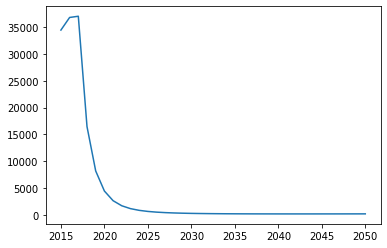

In [107]:
plt.plot(years, gas_dem)

In [2]:
df_params = pd.read_csv(sr.fp_csv_parameter_ranges)

In [8]:
df_params_new = pd.read_csv("/Users/jsyme/Desktop/parameter_ranges_CARLOS.csv")
fm = ["sector", "parameter", "strategy_id"]
dfp = df_params_new.copy()
fdat = [str(x) for x in range(2015, 2051)]
dfp = pd.merge(df_params, df_params_new[fm + fdat], how = "right", on = fm).reset_index(drop = True)


In [34]:
set_ext = set({})
for i in range(int(len(dfp)/2)):
    ind = i*2
    p = str(dfp["parameter"].iloc[ind])
    if float(dfp["2050_x"].iloc[ind]) == float(dfp["2050_y"].iloc[ind]):
        if float(dfp["2050_y"].iloc[ind]) != float(dfp["2050_y"].iloc[ind + 1]):
            #print("Parameter " + p + " has inconsistent 2050 values\n")
            set_ext = set_ext | {p}
    else:
        #print("Parameter " + p + " differs in 2050 across files\n")
        set_ext = set_ext | {p}
        
df_params2 = df_params[~df_params["parameter"].isin(set_ext)]
df_params2 = pd.concat([df_params2, df_params_new[df_params_new["parameter"].isin(set_ext)]], axis = 0).reset_index(drop = True)
df_params2["type"] = df_params2["type"].replace({"lever": "accion"})
df_params2 = df_params2.sort_values(by = ["sector", "type", "parameter", "strategy_id"])


In [37]:
df_params2.to_csv(sr.fp_csv_parameter_ranges, encoding = "UTF-8", index = None)


In [9]:
dfp = pd.read_csv("/Users/jsyme/Desktop/parameter_ranges_CARLOS.csv")
set_ext = set({})
for i in range(int(len(dfp)/2)):
    ind = i*2
    p = str(dfp["parameter"].iloc[ind])
    s = str(dfp["sector"].iloc[ind])
    if float(dfp["2050"].iloc[ind]) != float(dfp["2050"].iloc[ind + 1]):
        tup = tuple([s, p])
        set_ext = set_ext | {tup}
        
        
        

In [10]:
set_ext

{('public', 'public_frac_diesel')}

In [52]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)

In [50]:
del df_ed

In [56]:
"public_fra".replace({"fra": "tester"})

TypeError: replace() takes at least 2 arguments (1 given)

In [5]:
df_pr = pd.read_csv(sr.fp_csv_parameter_ranges)

In [18]:
df_tmp = df_pr[["sector", "parameter", "strategy_id", "parameter_constant_q", "min_2050", "max_2050", "2050"]].drop_duplicates()
df_tmp = sr.data_to_wide(df_tmp, "strategy_id", "2050", [x for x in df_tmp.columns if (x not in ["strategy_id", "2050"])], False)
df_tmp["parameter_constant_q"] = np.array(df_tmp["parameter_constant_q"].fillna(0)).astype(int)
df_tmp = df_tmp.rename(columns = {0: "2050_BAU", 1: "2050_NDP"})


In [20]:
df_tmp.to_csv(os.path.join(sr.dir_ref, "attribute_parameter_ranges.csv"), index = None, encoding = "UTF-8")